In [10]:
import torch
import torchvision


In [11]:
model = torchvision.models.inception_v3(weights="Inception_V3_Weights.IMAGENET1K_V1").to("cuda")

In [12]:
target_class = 107
input_image = torch.randn(1, 3, 299, 299).to("cuda")

In [13]:
input_image = input_image.detach().clone()
input_image.requires_grad_(True)
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

model.eval()
for i in range(10000):
    output = model(input_image)
    loss = -output[0, target_class]
    loss.backward()
    with torch.no_grad():
        input_image += 0.1 * input_image.grad
        input_image.clamp_(0, 1)
    input_image.grad.zero_()
    writer.add_scalar("Score", loss.item(), i)
    if i % 1000 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

Iteration 0, Loss: -1.336140513420105
Iteration 1000, Loss: 32.15848922729492
Iteration 2000, Loss: 44.28458786010742
Iteration 3000, Loss: 49.27384567260742
Iteration 4000, Loss: 54.96762466430664
Iteration 5000, Loss: 57.053565979003906
Iteration 6000, Loss: 60.07068634033203
Iteration 7000, Loss: 62.71135330200195
Iteration 8000, Loss: 63.03471755981445
Iteration 9000, Loss: 64.76616668701172


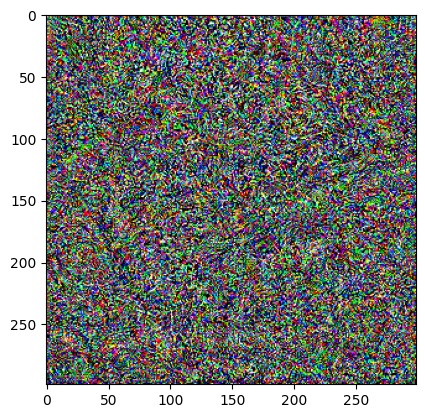

In [15]:
import matplotlib.pyplot as plt

plt.imshow(input_image[0].detach().cpu().permute(1, 2, 0).numpy())
plt.show()